In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from openbb import obb
obb.user.preferences.output_type = "dataframe"

In [7]:
data = obb.equity.price.historical(
    ["AAPL", "SPY"],
    start_date="2020-01-01",
    provider="yfinance"
).pivot(columns="symbol", values="close")

In [9]:
# Calculate the daily returns
returns = (
    data
    .pct_change(fill_method=None)
    .dropna()
)

In [15]:
# Reshape the data using the melt method
returns = returns.reset_index()
melted = pd.melt(
    returns,
    id_vars=["date"],
    value_vars=["AAPL"],
    var_name="stock",
    value_name="returns",
)

In [23]:
melted["date"] = pd.to_datetime(melted["date"])

In [25]:
melted["month"] = melted["date"].dt.to_period("M")

C:\Users\tsebo\AppData\Local\Temp\ipykernel_16176\3353799763.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(


[Text(0, 0, '2020-01'),
 Text(1, 0, '2020-02'),
 Text(2, 0, '2020-03'),
 Text(3, 0, '2020-04'),
 Text(4, 0, '2020-05'),
 Text(5, 0, '2020-06'),
 Text(6, 0, '2020-07'),
 Text(7, 0, '2020-08'),
 Text(8, 0, '2020-09'),
 Text(9, 0, '2020-10'),
 Text(10, 0, '2020-11'),
 Text(11, 0, '2020-12'),
 Text(12, 0, '2021-01'),
 Text(13, 0, '2021-02'),
 Text(14, 0, '2021-03'),
 Text(15, 0, '2021-04'),
 Text(16, 0, '2021-05'),
 Text(17, 0, '2021-06'),
 Text(18, 0, '2021-07'),
 Text(19, 0, '2021-08'),
 Text(20, 0, '2021-09'),
 Text(21, 0, '2021-10'),
 Text(22, 0, '2021-11'),
 Text(23, 0, '2021-12'),
 Text(24, 0, '2022-01'),
 Text(25, 0, '2022-02'),
 Text(26, 0, '2022-03'),
 Text(27, 0, '2022-04'),
 Text(28, 0, '2022-05'),
 Text(29, 0, '2022-06'),
 Text(30, 0, '2022-07'),
 Text(31, 0, '2022-08'),
 Text(32, 0, '2022-09'),
 Text(33, 0, '2022-10'),
 Text(34, 0, '2022-11'),
 Text(35, 0, '2022-12'),
 Text(36, 0, '2023-01'),
 Text(37, 0, '2023-02'),
 Text(38, 0, '2023-03'),
 Text(39, 0, '2023-04'),
 Text(40, 

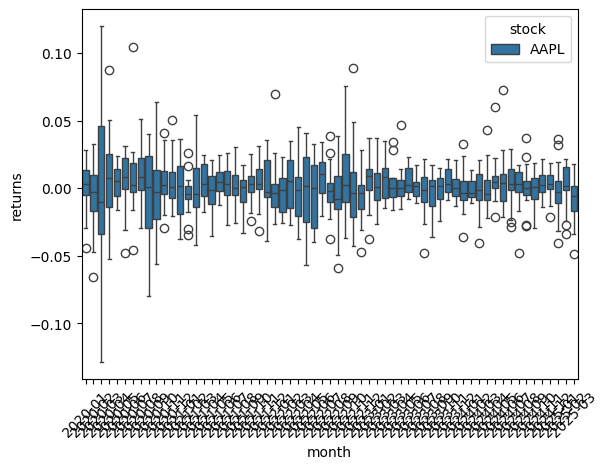

In [27]:
g = sns.boxplot(
    x="month",
    y="returns",
    hue="stock",
    data=melted
)
g.set_xticklabels(
    melted["month"].unique(),
    rotation=45
)

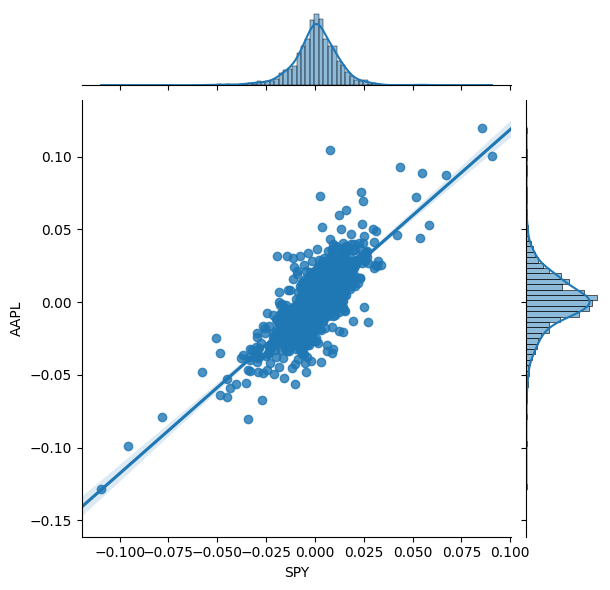

In [29]:
# creating a jointplot 
g = sns.jointplot(
    x="SPY",
    y="AAPL",
    data=returns,
    kind="reg",
    truncate=False,
)

In [53]:
# Here we are building a correlation matrix for the stocks in the Dow Jones Industrial Average
# Read_Html extracts tables from webpages
dji = pd.read_html(
    "https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average"
)[2]

In [55]:
print(dji.columns)

Index(['Company', 'Exchange', 'Symbol', 'Industry', 'Date added', 'Notes',
       'Index weighting'],
      dtype='object')


In [57]:
# Loading data
dji_data = (
    obb.equity.price.historical(
        dji.Symbol, start_date="2020-01-01", provider="yfinance"
    )
).pivot(columns="symbol", values="close")

# Caculate the daily returns
dji_returns = dji_data.pct_change(fill_method=None).dropna()

In [59]:
# We use corr to understand the relationship between the different stocks
corr = dji_returns.corr()

In [61]:
# Creating a mask to hide the upper triangle fo the correlation matrix as it mirros the lower triangle
mask = np.triu(
    np.ones_like(corr, dtype=bool)
)

In [67]:
# Creating a color palette to differentiate between positive from negative correlations in our heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

In [ ]:
# Plotting the heatmap
plt.rcParams["font.size"] = 4
sns.